# <p style="background-color:#FF5733; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Customer Churn Modeling</p>

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:150%; text-align:left">

<h3 align="left"><font color='#4E5672'>Telco Customer Churn Feature Engineering</font></h3>

 **Problem** : 
*     You have been tasked with developing a machine learning model capable of predicting customers who are likely to leave the company. Before creating the model, you are required to conduct the essential data analysis and perform feature engineering steps.
    
*    The Telco customer churn data was gathered during the third quarter from 7043 customers in California who availed home phone and Internet services.
    
*    This dataset contains information about a fictional telecom company, specifying which customers have left, stayed, or signed up for the service.

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:150%; text-align:left">

<h3 align="left"><font color='#4E5672'> Dataset Story</font></h3>
    
*     **CustomerId**: Customer ID
*     **Gender**: Gender 
*     **SeniorCitizen**: Whether the customer is a senior citizen (1, 0)
*     **Partner**: Whether the client has a partner (Yes, No) - Indicates if the customer is married or not   
*     **Dependents**: Whether the client has dependents (Yes, No) - Indicates if the customer has children, parents, grandparents, etc.  
*     **Tenure**: Number of months the customer has stayed with the company
*     **PhoneService**: Whether the customer has phone service (Yes, No)
*     **MultipleLines**: Whether the customer has more than one line (Yes, No, No phone service)
*     **InternetService**: Customer's internet service provider (DSL, Fiber optic, No)
*     **OnlineSecurity**: Whether the customer has online security (Yes, No, No Internet service)
*     **OnlineBackup**: Whether the customer has online backup (Yes, No, No Internet service)
*     **DeviceProtection**: Whether the customer has device protection (Yes, No, No Internet service)
*     **TechSupport**: Whether the customer receives technical support (Yes, No, No Internet service)
*     **StreamingTV**: Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates if the customer uses the Internet service to stream television programs from a third-party provider
*     **StreamingMovies**: Whether the customer has streaming movies (Yes, No, No Internet service) - Indicates if the customer uses the Internet service to stream movies from a third-party provider
*     **Contract**: Duration of the customer's contract (Month to month, One year, Two years)
*     **PaperlessBilling**: Whether the customer receives a paperless bill (Yes, No)
*     **PaymentMethod**: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
*     **MonthlyCharges**: Amount charged to the customer monthly
*     **TotalCharges**: Total amount charged to the customer
*     **Churn**: Whether the customer is using the service or not (Yes or No) - Refers to customers who left in the last month or quarter


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


import warnings
warnings.simplefilter(action="ignore")

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# TotalCharges must be a numeric variable

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


# <p style="background-color:#B377AC; font-family:newtimeroman;color:#FFF9ED; font-size:130%; text-align:center; border-radius: 15px 50px;">EXPLORATORY DATA ANALYSIS</p>

In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

def check_outliers(dataframe, head=5):
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [12]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling          

In [13]:
num_cols = df[["tenure", "MonthlyCharges", "TotalCharges"]]
check_outliers(num_cols)

##################### Quantiles #####################
                0.000  0.050    0.500    0.950    0.990    1.000
tenure          0.000  1.000   29.000   72.000   72.000   72.000
MonthlyCharges 18.250 19.650   70.350  107.400  114.729  118.750
TotalCharges   18.800 49.605 1397.475 6923.590 8039.883 8684.800


# <p style="background-color:#257BD1; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">CAPTURING NUMERIC AND CATEGORICAL VARIABLES</p>

In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optional
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [16]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [17]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
cat_but_car

['customerID']

# <p style="background-color:#90AF79; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">CATEGORICAL VARIABLES ANALYSIS</p>

In [19]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


In [20]:
for col in cat_cols:
    cat_summary(df, col)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################
                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         24

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
    
<h3 align="left"><font color='#4E5672'>Comments </font></h3>
    
* Approximately 50% of customers have a partner (are married).

* About half of the customers in our dataset are men, and the other half are women.
    
* Only 30% of the total customers have dependents.
    
* Ninety percent (90%) of customers receive telephone service.
    
* Among the 90% who receive telephone service, 53% do not have more than one line.
    
* Twenty-one percent (21%) do not have an internet service provider.
    
* Most customers are on month-to-month contracts, with a similar number of customers on 1-year and 2-year contracts.
    
* Sixty percent (60%) of customers receive paperless invoices.
    
* Around 26% of customers have left the platform in the last month.
    
* Sixteen percent (16%) of the dataset consists of older customers, indicating that most customers in the data are young.

# <p style="background-color:#9C79AF; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">NUMERICAL VARIABLES ANALYSIS</p>

In [21]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


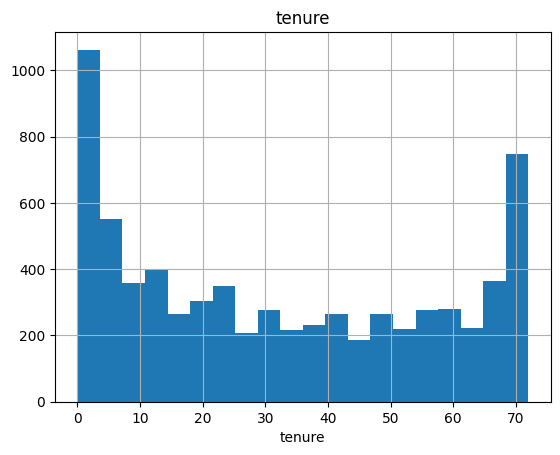

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


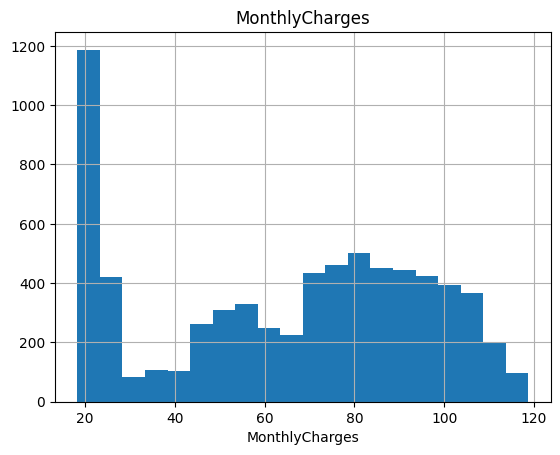

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


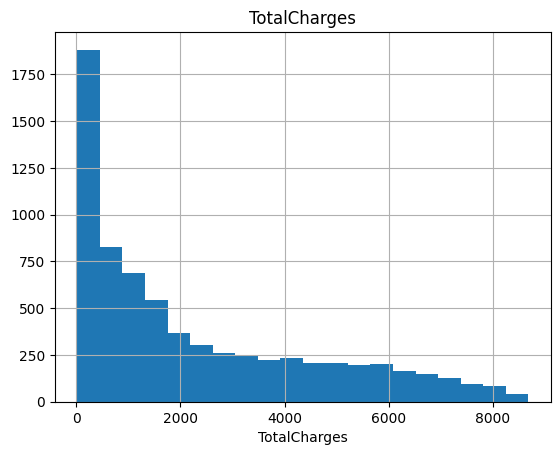

In [22]:
for col in num_cols:
    num_summary(df, col, plot=True)

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
    
<h3 align="left"><font color='#4E5672'>Comments </font></h3>
    
* When we look at Tenure, we see that 1-month customers are very high, followed by 70-month customers.



# <p style="background-color:#4A2A5B; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">ANALYSIS OF NUMERICAL VARIABLES BY TARGET</p>

In [23]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [24]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
    
<h3 align="left"><font color='#4E5672'>Comments </font></h3>
    
* When we look at the relationship between Tenure and Churn, we see that customers who do not churn have been customers for a longer period of time. When monthly charges and Churn are analyzed, the average monthly payments of churn customers are higher.


# <p style="background-color:#8E1FC9; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">ANALYSIS OF CATEGORICAL VARIABLES BY TARGET</p>

In [25]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [26]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303


Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959


PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
MultipleLines                              
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
                 TARGET_MEAN  Count  Ratio
InternetService                           
DSL                    0.19

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
    
<h3 align="left"><font color='#4E5672'>Comments </font></h3>
    
* Almost equal churn percentage for men and women.
* Customers with partners and dependents have a lower churn rate.
* No difference in Phone Service and Multiple Lines.
* Loss rate is much higher in Fiber Optic Internet Services.
* Customers without services like No Online Security, Online Backup, and Tech Support have a high churn rate.
* A larger percentage of customers with a monthly subscription churn compared to customers with one or two-year contracts.
* Those with paperless billing have a higher churn rate.
* Customers with Electronic Check Payment Method tend to leave the platform more than with other options.
* Older customers have a higher churn percentage.


# <p style="background-color:#C91F48; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">CORRELATION</p>

In [27]:
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


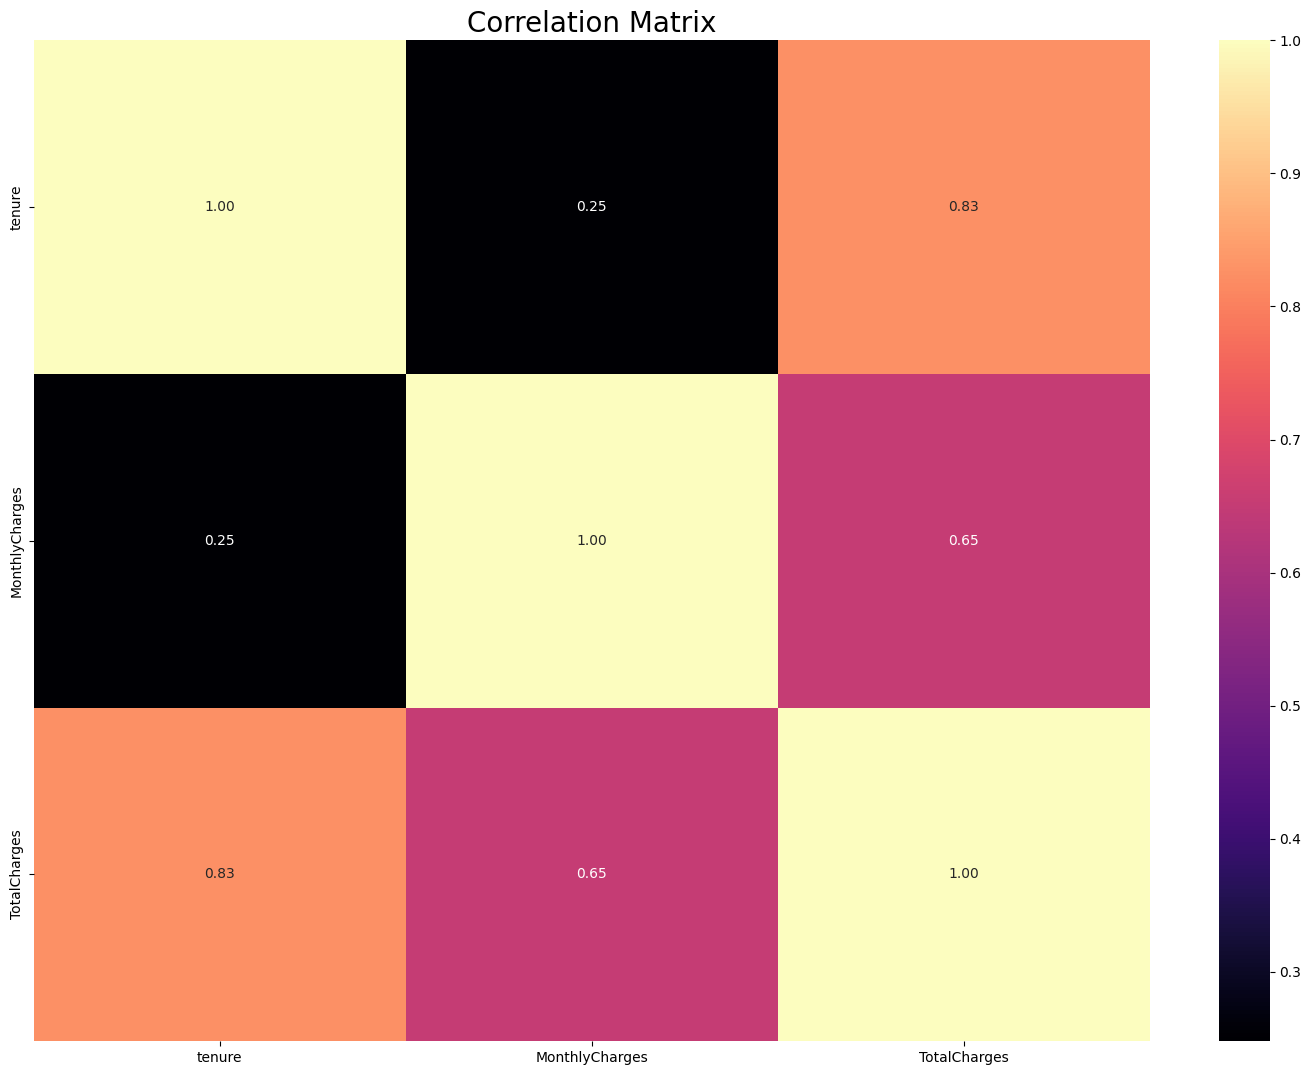

In [28]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [29]:
# TotalChargers is highly correlated with monthly wages and tenure
df.corrwith(df["Churn"], numeric_only=True).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.352
dtype: float64

# <p style="background-color:#228A2D; font-family:newtimeroman;color:#FFF9ED; font-size:130%; text-align:center; border-radius: 15px 50px;">FEATURE ENGINEERING</p>

# <p style="background-color:#4C17BC; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">MISSING VALUE ANALYSIS</p>

In [30]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [32]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


In [33]:
df.iloc[df[df["TotalCharges"].isnull()].index,19] = df[df["TotalCharges"].isnull()]["MonthlyCharges"]
df["tenure"] = df["tenure"] + 1
df[df["tenure"]==1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,52.550,0
753,3115-CZMZD,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,20.250,0
936,5709-LVOEQ,Female,0,Yes,Yes,1,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,80.850,0
1082,4367-NUYAO,Male,0,Yes,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,25.750,0
1340,1371-DWPAZ,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,56.050,0
3331,7644-OMVMY,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,19.850,0
3826,3213-VVOLG,Male,0,Yes,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,25.350,0
4380,2520-SGTTA,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,20.000,0
5218,2923-ARZLG,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,19.700,0
6670,4075-WKNIU,Female,0,Yes,Yes,1,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,73.350,0


# <p style="background-color:#BC7117; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">OUTLIER ANALYSIS</p>

In [34]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [35]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [36]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [37]:
# Outlier Analysis and Suppression
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


# <p style="background-color:#9BBC17; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">BASE MODEL SETUP</p>

In [38]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [39]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [40]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

In [41]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

In [42]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8034
Auc: 0.8424
Recall: 0.5378
Precision: 0.6589
F1: 0.5918
########## KNN ##########
Accuracy: 0.763
Auc: 0.746
Recall: 0.4462
Precision: 0.5691
F1: 0.4997
########## CART ##########
Accuracy: 0.728
Auc: 0.6586
Recall: 0.5077
Precision: 0.4886
F1: 0.4977
########## RF ##########
Accuracy: 0.792
Auc: 0.8252
Recall: 0.4842
Precision: 0.6448
F1: 0.5529
########## XGB ##########
Accuracy: 0.7833
Auc: 0.8228
Recall: 0.5072
Precision: 0.6123
F1: 0.5542
########## LightGBM ##########
Accuracy: 0.7982
Auc: 0.8373
Recall: 0.5281
Precision: 0.6482
F1: 0.5816
########## CatBoost ##########
Accuracy: 0.797
Auc: 0.8401
Recall: 0.5051
Precision: 0.6531
F1: 0.5691


# <p style="background-color:#83A2D1; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">FEATURE CREATION</p>

In [43]:
# Create an annual categorical variable from the variable Tenure

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

# Engaged customers with 1 or 2 year contracts
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# People who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Young customers with a monthly contract
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Total number of services received by a person
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# People who receive any streaming service
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Does the person make automatic payments?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# Average monthly payment
df["NEW_AVG_Charges"] = df["TotalCharges"] / df["tenure"]

# Increase in current price compared to average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Fee per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,2,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,35,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,3,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


In [45]:
df.shape

(7043, 31)

# <p style="background-color:#78659F; font-family:newtimeroman;color:#FFF9ED; font-size:130%; text-align:center; border-radius: 15px 50px;">ENCODING</p>

In [46]:
# Separating variables according to their type

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


# <p style="background-color:#C752C7; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;"> LABEL ENCODING</p>

In [47]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [48]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [49]:
for col in binary_cols:
    df = label_encoder(df, col)

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,0,0,1,0,2,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,1,0,0,0,35,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,1,0,0,0,3,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,1,0,0,0,46,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,0,0,0,0,3,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


In [51]:
# One-Hot Encoding Process
# Updating the cat_cols list
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [52]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [53]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [54]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,2,0,1,29.850,29.850,0,1,14.925,0.500,14.925,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
1,5575-GNVDE,1,0,0,35,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False
2,3668-QPYBK,1,0,0,3,1,1,53.850,108.150,1,3,36.050,0.669,13.463,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,46,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True
4,9237-HQITU,0,0,0,3,1,1,70.700,151.650,1,1,50.550,0.715,35.350,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False


# <p style="background-color:#659AEC; font-family:newtimeroman;color:#FFF9ED; font-size:130%; text-align:center; border-radius: 15px 50px;">MODELING</p>

In [55]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [56]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

In [57]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8005
Auc: 0.8387
Recall: 0.5024
Precision: 0.6639
F1: 0.5718
########## KNN ##########
Accuracy: 0.7703
Auc: 0.7537
Recall: 0.465
Precision: 0.5857
F1: 0.5175
########## CART ##########
Accuracy: 0.7302
Auc: 0.6602
Recall: 0.5067
Precision: 0.4922
F1: 0.4992
########## RF ##########
Accuracy: 0.7934
Auc: 0.8269
Recall: 0.5072
Precision: 0.6404
F1: 0.5659
########## XGB ##########
Accuracy: 0.7862
Auc: 0.8212
Recall: 0.5072
Precision: 0.6197
F1: 0.5574
########## LightGBM ##########
Accuracy: 0.7933
Auc: 0.8356
Recall: 0.5206
Precision: 0.6357
F1: 0.5721
########## CatBoost ##########
Accuracy: 0.7975
Auc: 0.841
Recall: 0.5179
Precision: 0.6493
F1: 0.576


# <p style="background-color:#249C41; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">RANDOM FOREST</p>

In [58]:
rf_model = RandomForestClassifier(random_state=17)

In [59]:
rf_params = {"max_depth": [5, 8, None], # Maximum depth of the tree
             "max_features": [3, 5, 7, "auto"], # Number of features to consider when looking for the best split
             "min_samples_split": [2, 5, 8, 15, 20], # Minimum number of instances required to split a node
             "n_estimators": [100, 200, 500]} # Number of trees

In [60]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [61]:
rf_best_grid.best_params_ 

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 15,
 'n_estimators': 100}

In [62]:
rf_final = RandomForestClassifier(max_depth=None, max_features=7,min_samples_split=15,n_estimators=100,random_state=17).fit(X, y)

In [63]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision"])

In [64]:
cv_results['test_accuracy'].mean()

0.8030615328820115

In [65]:
cv_results['test_f1'].mean()

0.5798730358826453

In [66]:
cv_results['test_recall'].mean()

0.5120579610143177

In [67]:
cv_results['test_precision'].mean()

0.6690793512830604

# <p style="background-color:#847F86; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">XGBoost</p>

In [68]:
xgboost_model = XGBClassifier(random_state=17)

In [69]:
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

In [70]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [71]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [72]:
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [73]:
cv_results['test_accuracy'].mean()

0.7997985170857511

In [74]:
cv_results['test_f1'].mean()

0.5816278185682929

In [75]:
cv_results['test_roc_auc'].mean()

0.8440794816424727

# <p style="background-color:#73607B; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">LightGBM</p>

In [77]:
lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [78]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [79]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [80]:
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [81]:
cv_results['test_accuracy'].mean()

0.8013610170857511

In [82]:
cv_results['test_f1'].mean()

0.5848826808217215

In [83]:
cv_results['test_roc_auc'].mean()

0.845622941129788

# <p style="background-color:#634551; font-family:newtimeroman;color:#FFF9ED; font-size:100%; text-align:center; border-radius: 15px 50px;">Catboost</p>

In [84]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [85]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [86]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)


In [87]:
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [88]:
cv_results['test_accuracy'].mean()

0.801929198903933

In [89]:
cv_results['test_f1'].mean()

0.5676969578746122

In [90]:
cv_results['test_roc_auc'].mean()

0.847591916335241

# <p style="background-color:#FF3686; font-family:newtimeroman;color:#FFF9ED; font-size:130%; text-align:center; border-radius: 15px 50px;">FEATURE IMPORTANCE</p>

In [91]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

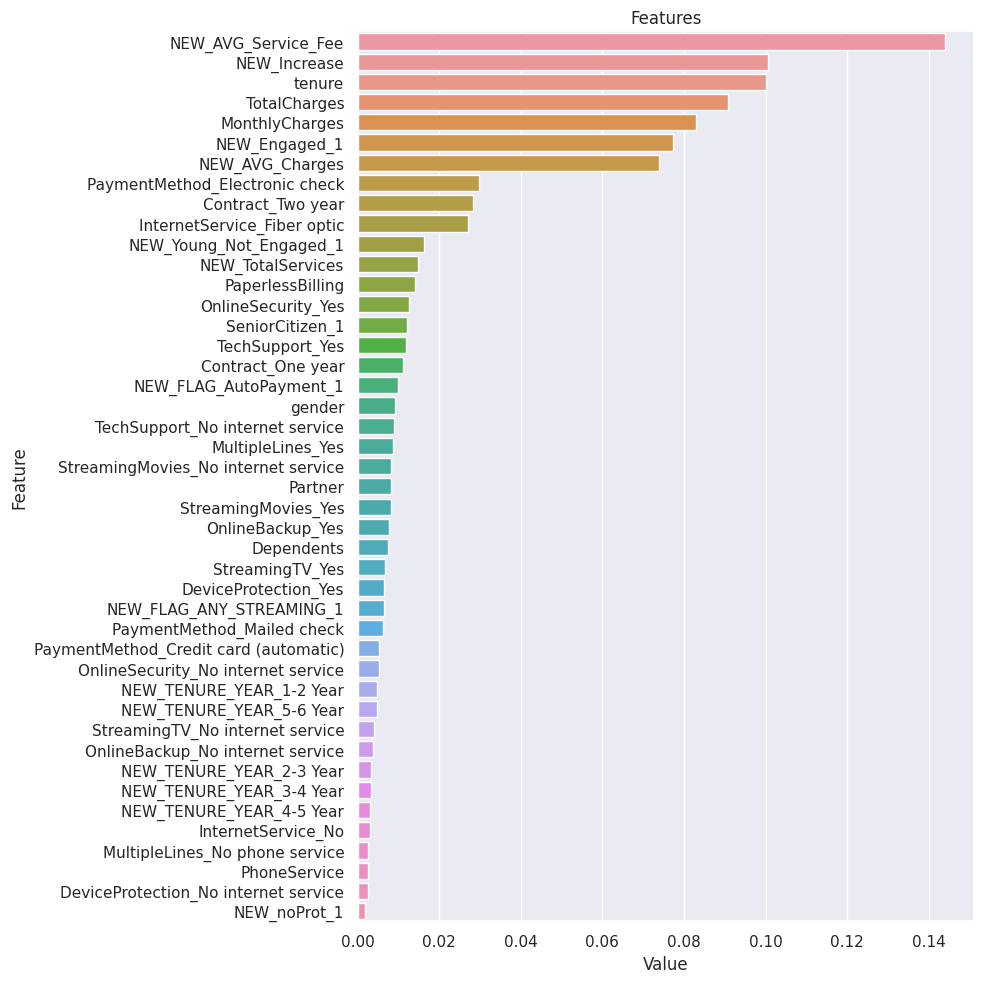

In [92]:
plot_importance(rf_final, X)

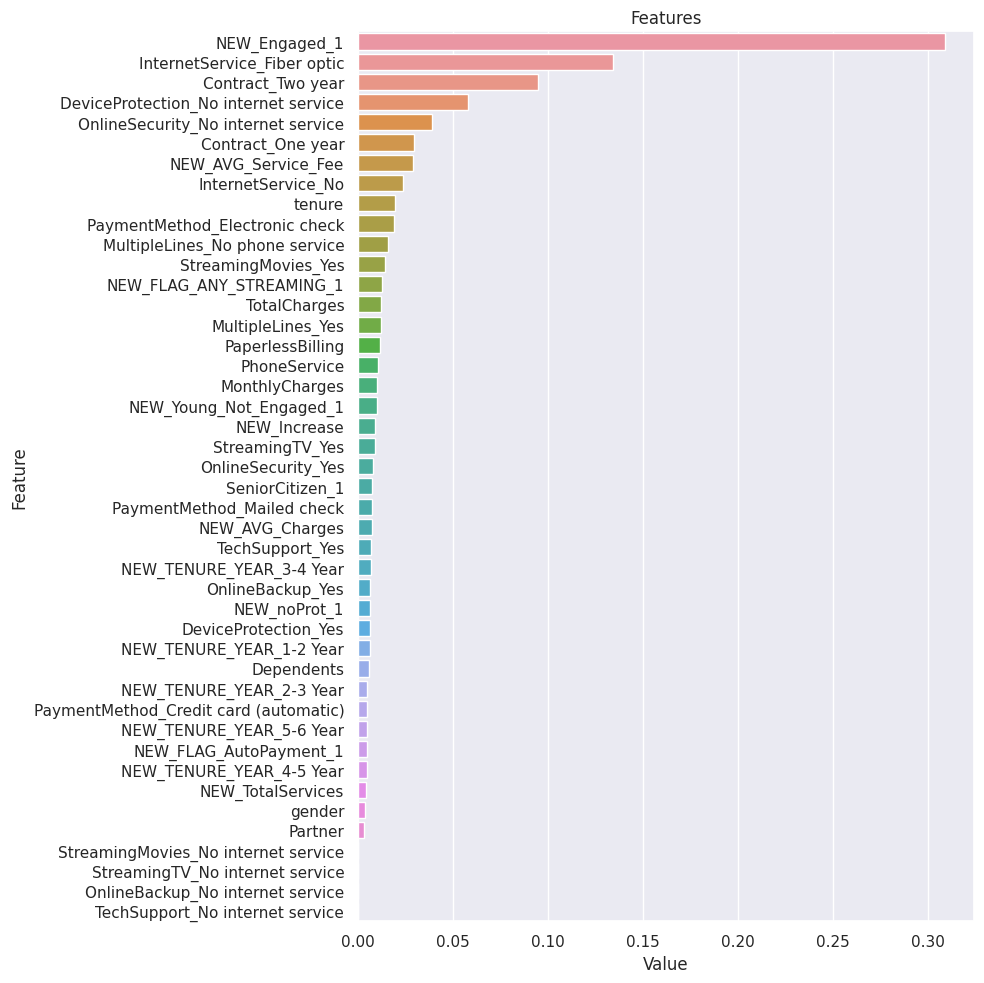

In [93]:
plot_importance(xgboost_final, X)

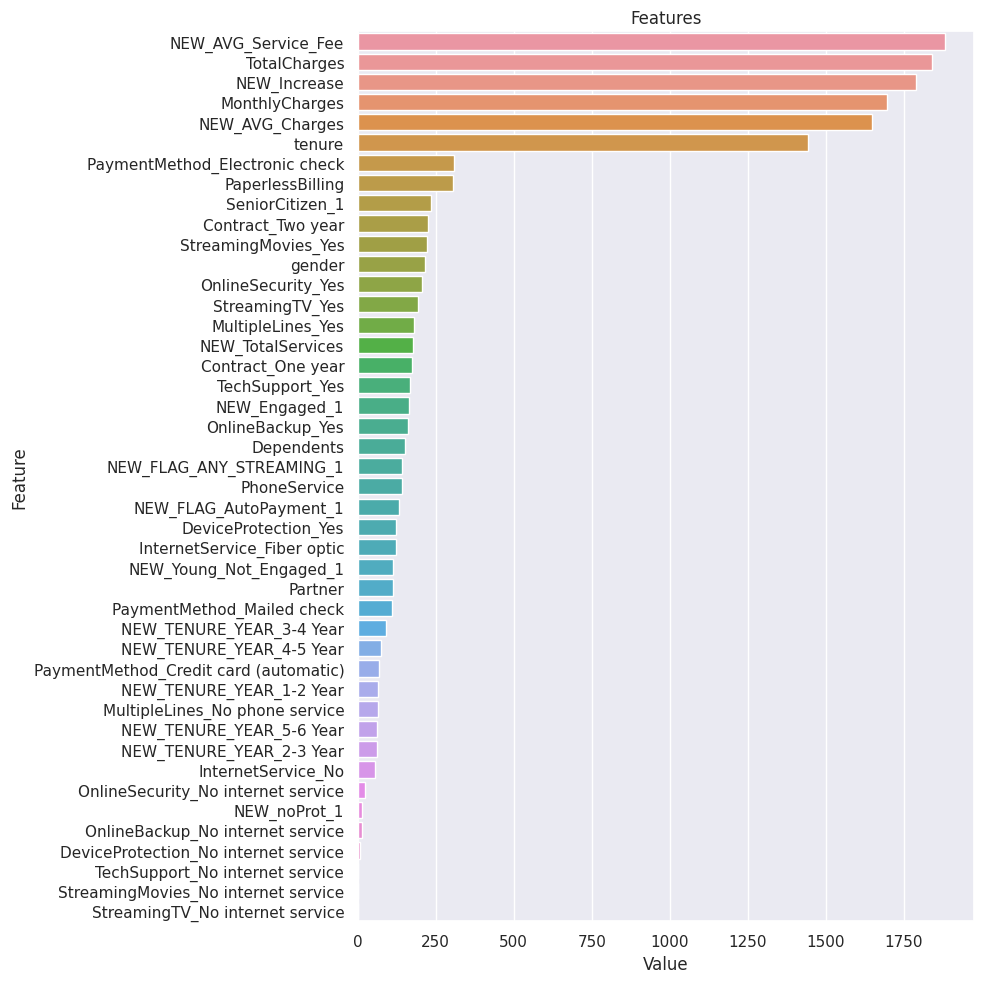

In [94]:
plot_importance(lgbm_final, X)

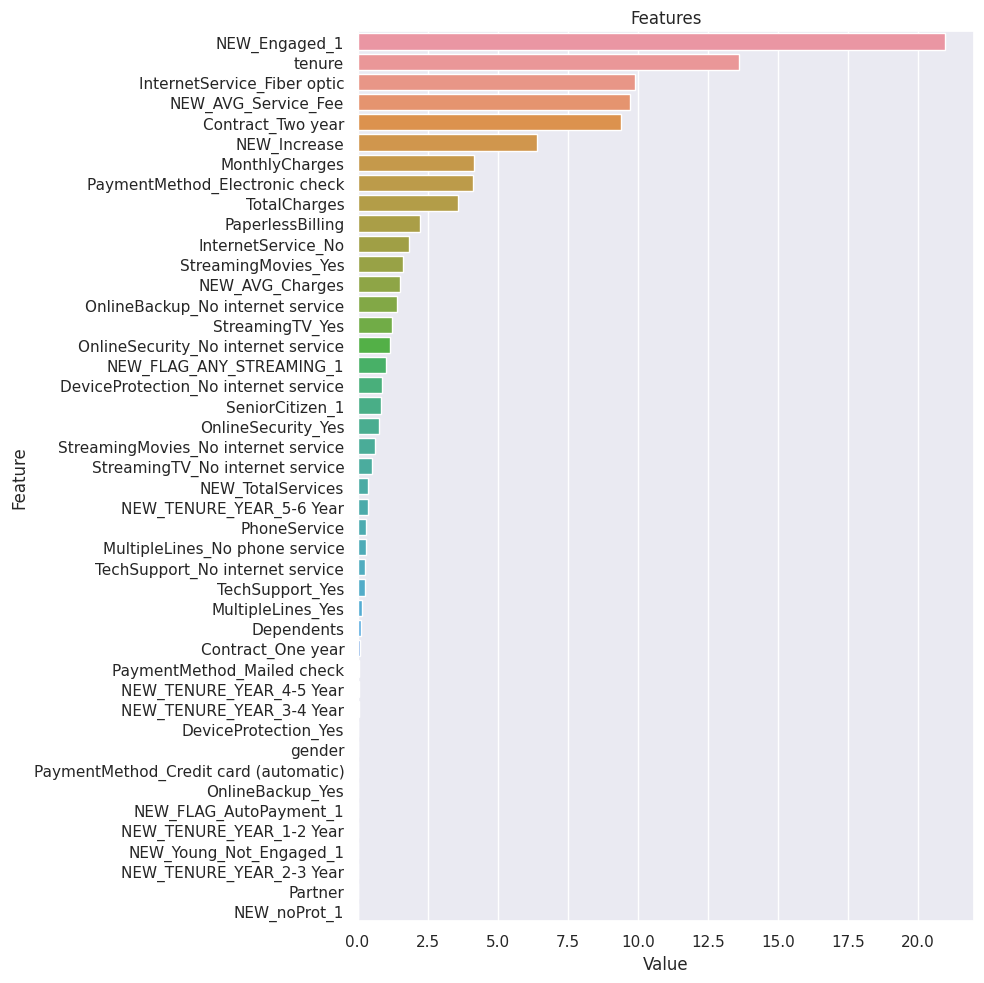

In [95]:
plot_importance(catboost_final, X)